I recently made a map in R showing our SARS-CoV-2 collaborations. I thought that it came out really well and maybe other people might want to make a map (about anything). Here I will show you how to make a map in R that shows which countries have a monarchy, as a simple illustrative example.



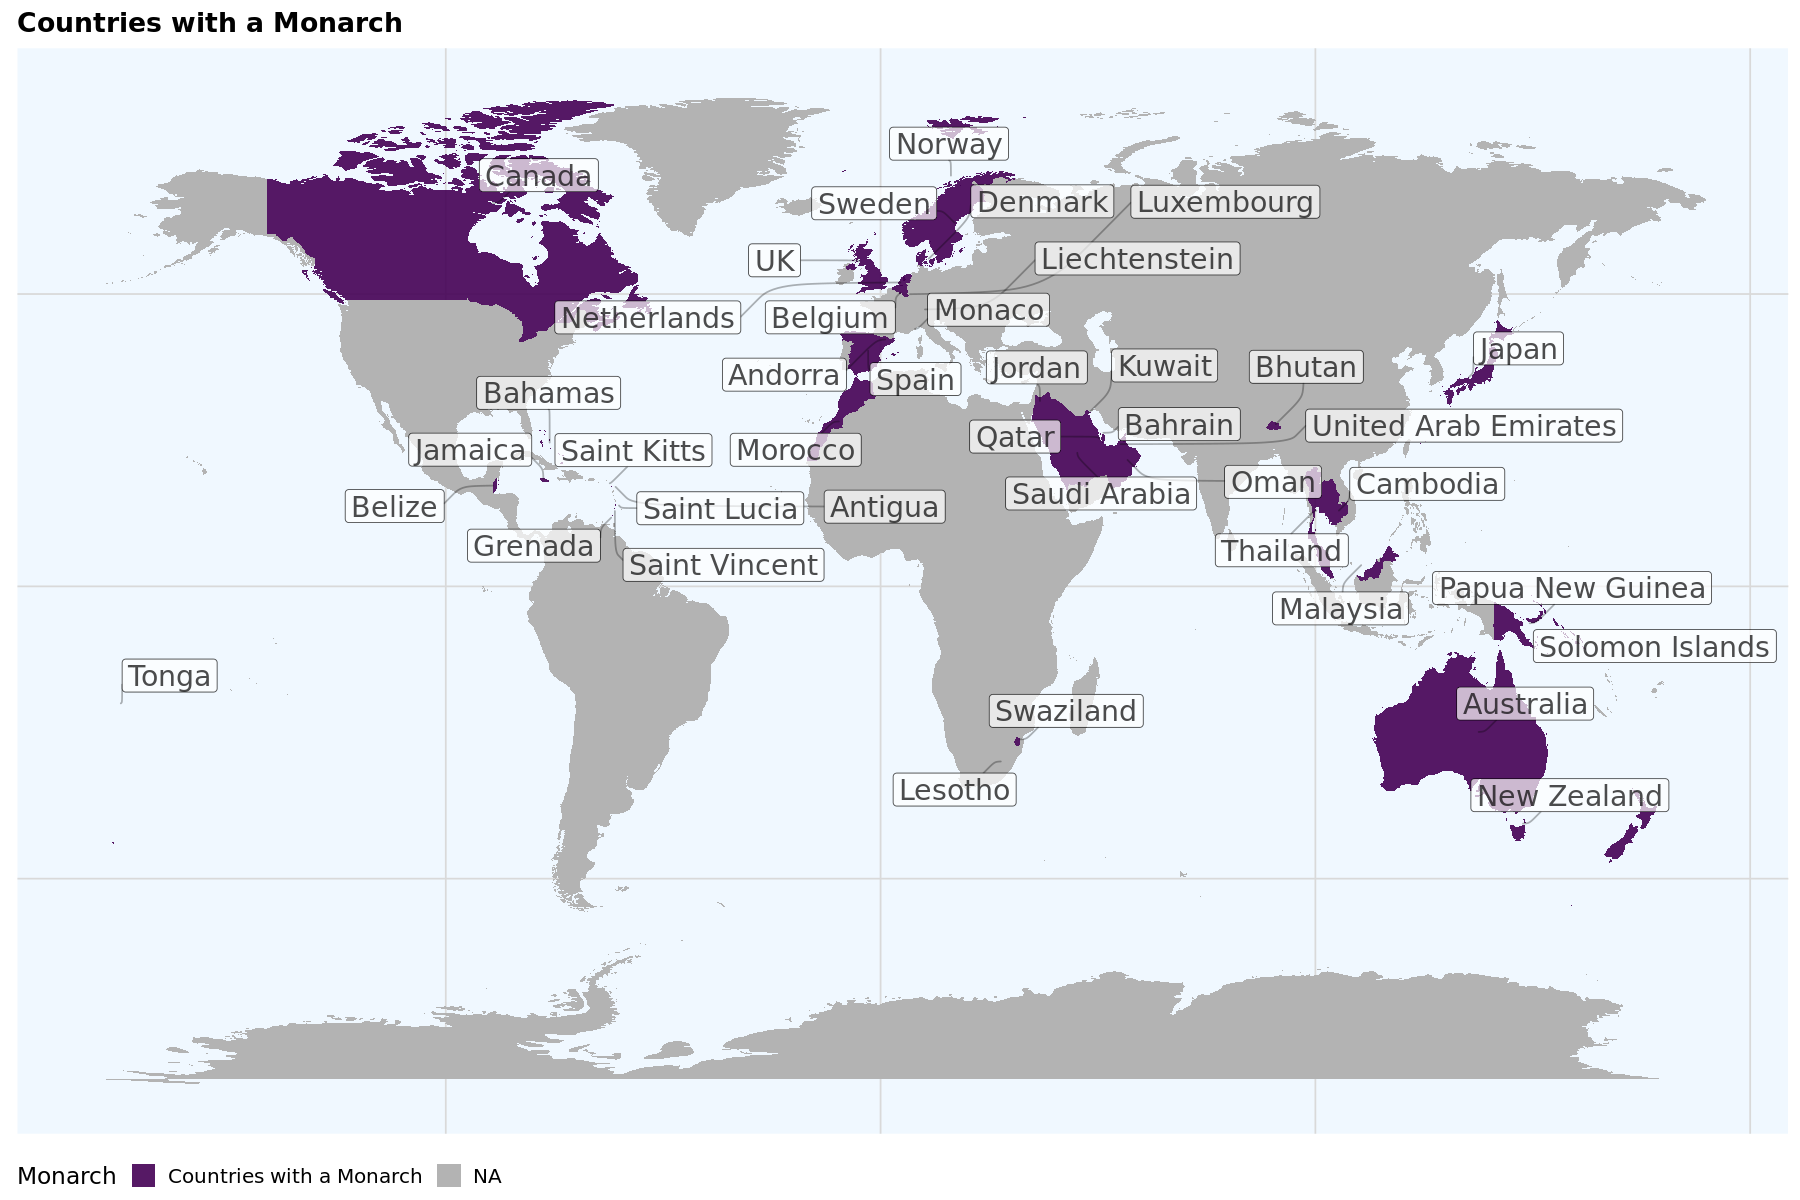

In [7]:
library(ggplot2)
library(sf)
# install sf via conda, esp. if you have installed R through conda.
library(dplyr)
library(ggrepel)
library(cowplot)
require(maps)
require(mapproj)

# Resize the final preview figure.
options(repr.plot.width=15, repr.plot.height=10)

# Countries with a Monarchy. A list from the internet.
my_countries <- c( "Andorra", "Antigua", "Australia",  "Bahamas", "Bahrain", "Belgium",
"Belize", "Bhutan", "Cambodia",  "Canada", "Denmark", "Swaziland",
"Grenada", "Jamaica", "Japan", "Jordan", "Kuwait", "Lesotho", "Liechtenstein",
"Luxembourg",  "Malaysia", "Monaco", "Morocco", "Netherlands",
"New Zealand", "Norway", "Oman", "Papua New Guinea", "Qatar", "Saint Kitts",
"Saint Lucia", "Saint Vincent", "Saudi Arabia", "Solomon Islands",
"Spain", "Sweden", "Thailand", "Tonga", "Tuvalu", "United Arab Emirates", "UK",
"Vatican City")

# Retrieve the map data
country.maps <- map_data("world") 

# Mutation to indicate which countries to highlight
country.maps <- mutate(country.maps ,
    Monarch = ifelse(region %in% my_countries,
        "Countries with a Monarch", NA))

# This is to position the region name labels
country.maps.labels <- country.maps %>%
   group_by(region) %>%
   filter(region %in% my_countries) %>%
   summarise(long = mean(long), lat = mean(lat))


# Now to plot
p <- ggplot(country.maps, aes(x = long, y =lat)) +
  ggtitle("Countries with a Monarch") +
  # We fill according to the value in the Monarch field. See mutation above,
  # Differnt values in the Monarch field (e.g. the Monarch's name) would give
  # different colour coding
  geom_polygon(aes( group = group, fill = Monarch)) +
  # geom_label_repel to automatically spread out the labels
  geom_label_repel(data = country.maps.labels, aes(x = long, y = lat, label = region),
                  nudge_x = .1, nudge_y = 0.1,
                  point.padding = unit(0.1, "lines"),
                  size = 6,
                  force_pull = 5,
                  segment.alpha = 0.3,
                  min.segment.length = 0.5,
                  alpha = 0.7, show.legend = F,
                  box.padding = 0.5,
                  segment.curvature = -0.01,
                  segment.ncp = 1,
                  segment.angle = 30,
                  max.overlaps = 50,
                  force = 5) +
  scale_fill_viridis_d(na.value='grey70', alpha = .9) +
  theme_minimal_grid() +
  theme(legend.position = "bottom",
    # Remove all the axis around the edges
       axis.title.y=element_blank(),
       axis.ticks.y=element_blank(),
       axis.text.y=element_blank(),
       axis.ticks.x=element_blank(),
       axis.text.x=element_blank(),
       axis.title.x=element_blank()) +
      theme(panel.background = element_rect(fill = "aliceblue"))
      # Colour the background/ocean
p




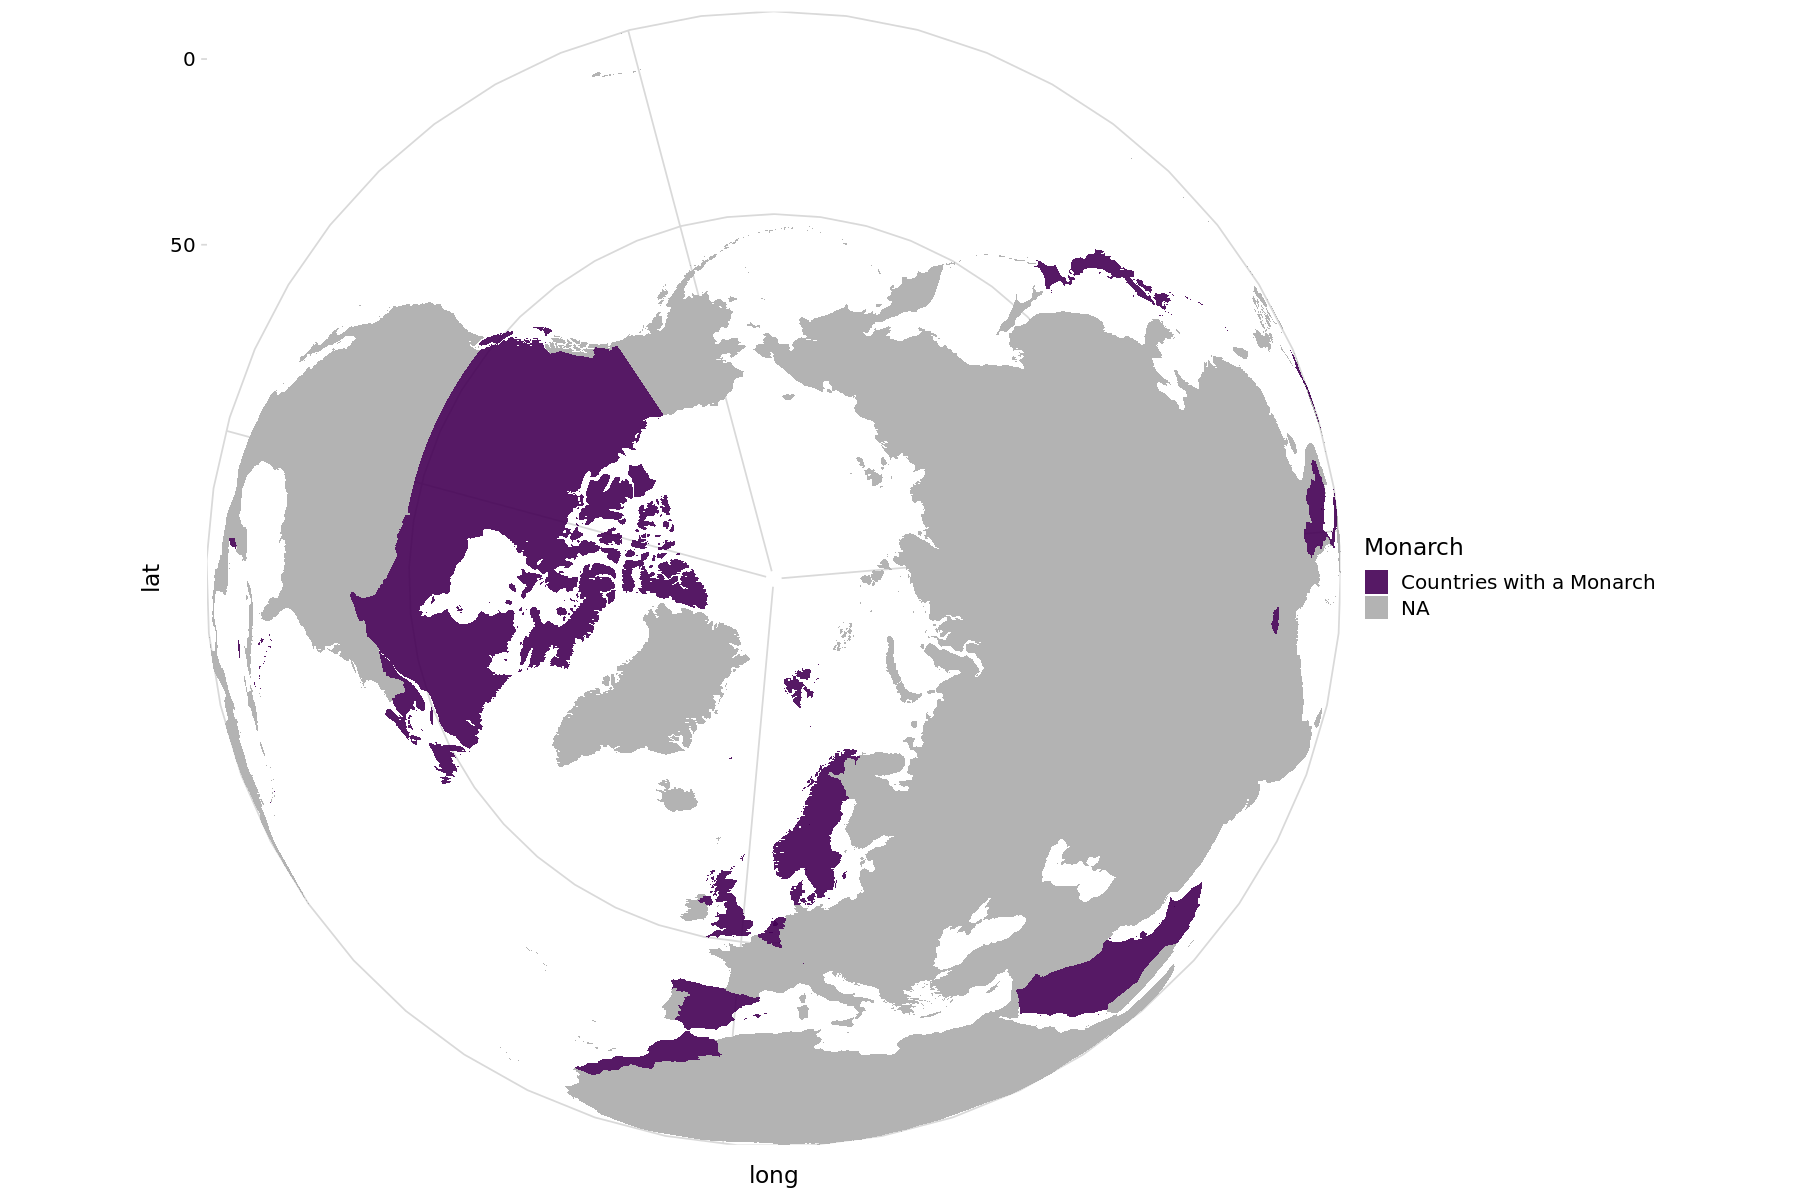

In [5]:
if (require("maps")) {
newmap <- ggplot(country.maps, aes(x = long, y =lat)) +
  geom_polygon(aes( group = group, fill = Monarch)) + 
    coord_map("orthographic") +
    
      scale_fill_viridis_d(na.value='grey70', alpha = .9) +
  theme_minimal_grid() 
newmap
}